In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scanpy as sc
import anndata as ad
import random
import matplotlib.pyplot as plt


In [2]:
# Load the MERFISH dataset
adata = ad.read_h5ad('/extra/zhanglab0/SpatialTranscriptomicsData/MERFISH/MouseBrainAging/2330673b-b5dc-4690-bbbe-8f409362df31.h5ad')
# Convert to DataFrame for easier manipulation
obs = pd.DataFrame(adata.obs)
obs['fov'] = obs.fov.astype(int)

In [3]:
adata.obs.columns

Index(['fov', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y',
       'age', 'clust_annot', 'slice', 'organism_ontology_term_id',
       'sex_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id',
       'assay_ontology_term_id', 'tissue_ontology_term_id',
       'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'donor_id', 'is_primary_data',
       'cell_type_annot', 'tissue_type', 'cell_type', 'assay', 'disease',
       'organism', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid'],
      dtype='object')

In [4]:
adata.obs

,fov,center_x,center_y,min_x,max_x,min_y,max_y,age,clust_annot,slice,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
296840548544172399853066257548860105346,0,-3758.309233158827,1391.5494912564754,-3763.661133030057,-3752.9573332875966,1387.6145913511514,1395.4843911617995,4wk,Astro-1,0,...,tissue,astrocyte,MERFISH,normal,Mus musculus,female,olfactory region,na,4 weeks,ZwcMIrTr7j
125440231316715565354815908578409815654,0,-3696.887734636664,1475.0979892462492,-3702.4031345039607,-3691.372334769368,1470.12758936584,1480.0683891266583,4wk,InN-Calb2-1,0,...,tissue,inhibitory interneuron,MERFISH,normal,Mus musculus,female,olfactory region,na,4 weeks,t<V{`ZuiDq
281867370064380610762953800107398502280,0,-3674.597235172987,1456.2409896999598,-3678.9681350678206,-3670.226335278153,1451.3795898169278,1461.1023895829917,4wk,Micro-1,0,...,tissue,microglial cell,MERFISH,normal,Mus musculus,female,olfactory region,na,4 weeks,?$si0otW*8
317191079211317201281385704641177614171,0,-3772.315732821822,1452.8074897825718,-3777.286132702232,-3767.345332941413,1447.564589908719,1458.0503896564246,4wk,Olig-1,0,...,tissue,oligodendrocyte,MERFISH,normal,Mus musculus,female,olfactory region,na,4 weeks,%p_5^aHElj
145186441853584143398162181590277934372,0,-3745.883233457804,1458.6389896422625,-3751.671133318544,-3740.095333597064,1452.9055897802114,1464.3723895043136,4wk,InN-Olf-1,0,...,tissue,inhibitory interneuron,MERFISH,normal,Mus musculus,female,olfactory region,na,4 weeks,4hD)Wn*k^T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336673865663781232877284032691751504893,644,7766.601212099194,-3361.00652320683,7759.995812258125,7773.206611940264,-3366.3039230793715,-3355.7091233342885,24wk,Endo-2,0,...,tissue,endothelial cell,MERFISH,normal,Mus musculus,female,striatum,na,24 weeks,d{yv%SLzhw
131117638919335084213290274068263613191,644,7758.42621229589,-3450.822521045804,7753.673812410236,7763.178612181544,-3455.683920928836,-3445.961121162772,24wk,Astro-1,0,...,tissue,astrocyte,MERFISH,normal,Mus musculus,female,striatum,na,24 weeks,t>s5u_0txZ
286679421147693250116014473271968370562,644,7717.82371327281,-3473.60352049768,7713.343813380599,7722.303613165021,-3478.246920385957,-3468.9601206094026,24wk,Peri-1,0,...,tissue,pericyte,MERFISH,normal,Mus musculus,female,striatum,na,24 weeks,&TCBtX>yeO
109937064206098733862640606573911922907,644,7810.31021104753,-3359.0990232527256,7804.903811177612,7815.716610917449,-3364.6689231187106,-3353.5291233867406,24wk,MSN-D2,0,...,tissue,medium spiny neuron,MERFISH,normal,Mus musculus,female,striatum,na,24 weeks,S_$%+5)a|q


In [5]:
tissue_list = list(obs['tissue'].values.unique())
tissue_list

['olfactory region',
 'corpus callosum',
 'striatum',
 'cortical layer VI',
 'pia mater',
 'brain ventricle',
 'cortical layer V',
 'cortical layer II/III']

In [6]:
donor_id_list = list(obs['donor_id'].unique())
for donor_id in donor_id_list:
    # each donor
    print(f'Donor_id: {donor_id}')
    donor_obs = obs[obs['donor_id'] == donor_id]
    donor_x = adata.X[obs['donor_id'] == donor_id]
    slice_list = list(donor_obs['slice'].unique())
    slice_list.sort()
    for slice_id in slice_list: 
        # each slice
        print(f'Slice_id: {slice_id}')
        slice_obs = donor_obs[donor_obs['slice'] == slice_id]
        slice_x = donor_x[donor_obs['slice'] == slice_id]

Donor_id: MsBrainAgingSpatialDonor_1
Slice_id: 0
Donor_id: MsBrainAgingSpatialDonor_2
Slice_id: 0
Slice_id: 1
Donor_id: MsBrainAgingSpatialDonor_3
Slice_id: 0
Slice_id: 1
Donor_id: MsBrainAgingSpatialDonor_4
Slice_id: 0
Slice_id: 1
Slice_id: 2
Donor_id: MsBrainAgingSpatialDonor_5
Slice_id: 0
Slice_id: 1
Slice_id: 2
Donor_id: MsBrainAgingSpatialDonor_6
Slice_id: 0
Slice_id: 1
Slice_id: 2
Donor_id: MsBrainAgingSpatialDonor_7
Slice_id: 0
Slice_id: 1
Slice_id: 2
Donor_id: MsBrainAgingSpatialDonor_8
Slice_id: 0
Slice_id: 1
Slice_id: 2
Donor_id: MsBrainAgingSpatialDonor_9
Slice_id: 0
Slice_id: 1
Slice_id: 2
Donor_id: MsBrainAgingSpatialDonor_10
Slice_id: 0
Slice_id: 1
Slice_id: 2
Donor_id: MsBrainAgingSpatialDonor_11
Slice_id: 0
Slice_id: 1
Slice_id: 2
Donor_id: MsBrainAgingSpatialDonor_12
Slice_id: 0
Slice_id: 1


In [7]:
slice_obs_df = pd.DataFrame(slice_obs)

In [8]:
slice_obs_df['min_x'] = slice_obs_df['min_x'].astype(float)
slice_obs_df['max_x'] = slice_obs_df['max_x'].astype(float)
slice_obs_df['min_y'] = slice_obs_df['min_y'].astype(float)
slice_obs_df['max_y'] = slice_obs_df['max_y'].astype(float)

In [9]:
# 计算每个FOV的边界
fov_boundaries = slice_obs_df.groupby('fov').agg(
    min_x=('min_x', 'min'),
    max_x=('max_x', 'max'),
    min_y=('min_y', 'min'),
    max_y=('max_y', 'max')
).reset_index()

In [10]:
fov_boundaries

,fov,min_x,max_x,min_y,max_y
0,0,2288.997139,2500.914934,-10494.378096,-10302.298300
1,1,2289.978139,2500.369934,-10698.520096,-10502.298300
2,2,2297.390139,2509.961934,-10890.672096,-10685.076301
3,3,2090.850139,2303.639934,-10899.828095,-10686.275301
4,4,2089.978139,2311.814934,-10698.520096,-10483.986301
...,...,...,...,...,...
289,298,-1499.012861,-1288.185066,-9099.283095,-8885.621301
290,299,-1506.642861,-1293.308066,-8901.027095,-8686.493301
291,300,-1509.367861,-1305.516066,-8690.127096,-8505.241300
292,303,-1669.037862,-1506.715066,-8698.302096,-8560.286299


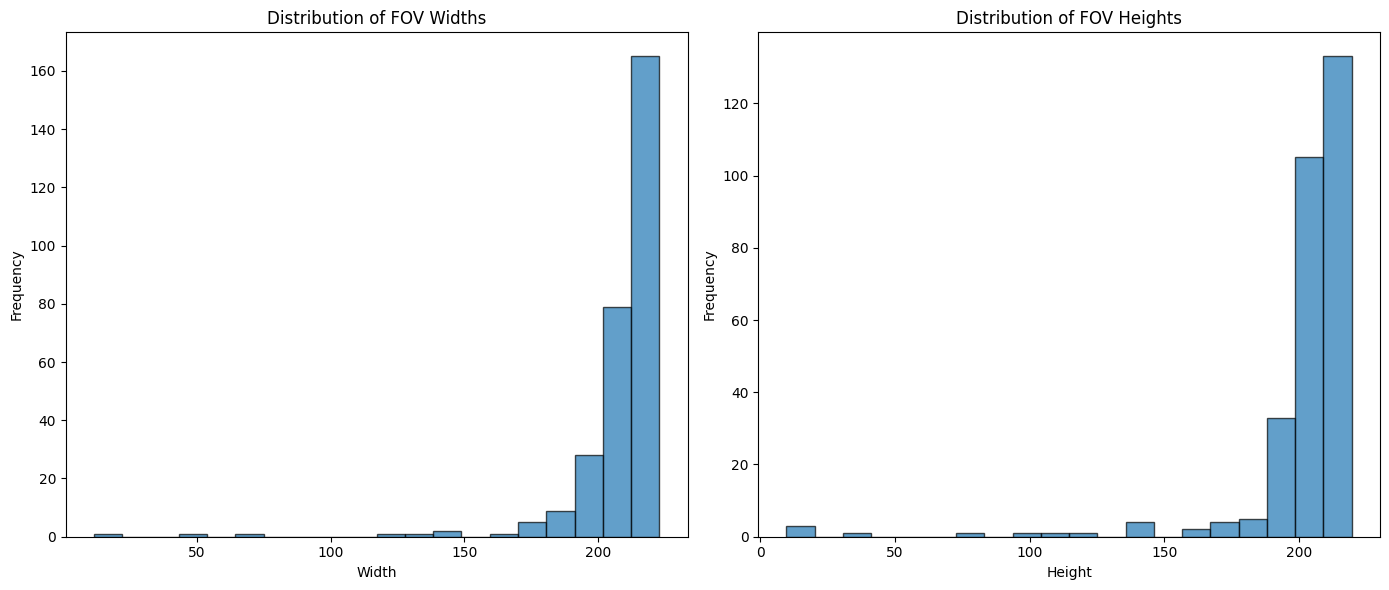

In [11]:
# 计算宽度和高度
fov_boundaries['width'] = fov_boundaries['max_x'] - fov_boundaries['min_x']
fov_boundaries['height'] = fov_boundaries['max_y'] - fov_boundaries['min_y']

# 绘制边长分布图
plt.figure(figsize=(14, 6))

# 绘制宽度分布
plt.subplot(1, 2, 1)
plt.hist(fov_boundaries['width'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of FOV Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

# 绘制高度分布
plt.subplot(1, 2, 2)
plt.hist(fov_boundaries['height'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of FOV Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
def visualize_top_tissue_distribution_by_fov(slice_obs):
    slice_obs_df = slice_obs_df = pd.DataFrame(slice_obs)
    tissue_proportions = slice_obs_df.groupby(['fov', 'tissue']).size().reset_index(name='count')
    total_cells_per_fov = slice_obs_df.groupby('fov').size().reset_index(name='total_count')

    tissue_proportions = pd.merge(tissue_proportions, total_cells_per_fov, on='fov')
    tissue_proportions['proportion'] = tissue_proportions['count'] / tissue_proportions['total_count']

    idx = tissue_proportions.groupby(['fov'])['proportion'].transform(max) == tissue_proportions['proportion']
    max_tissue_proportions = tissue_proportions[idx]

    plt.figure(figsize=(5, 3))
    plt.hist(max_tissue_proportions['proportion'], bins=20, edgecolor='k', alpha=0.7)
    plt.title('Distribution of Highest Tissue Proportions per FOV')
    plt.xlabel('Proportion')
    plt.ylabel('Frequency')
    plt.show()
    
    top_tissue_counts = max_tissue_proportions['tissue'].value_counts()
    
    plt.figure(figsize=(5, 3))
    top_tissue_counts.plot(kind='bar', color='skyblue', edgecolor='k')
    plt.title('Number of FOVs for Each Top Tissue Type')
    plt.xlabel('Tissue Type')
    plt.ylabel('Number of FOVs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Donor_id: MsBrainAgingSpatialDonor_1
Slice_id: 0


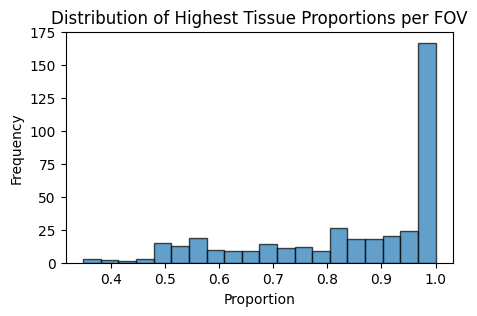

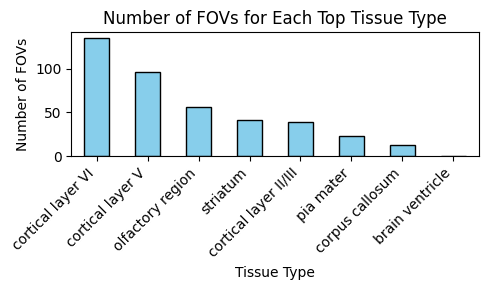

Donor_id: MsBrainAgingSpatialDonor_2
Slice_id: 0


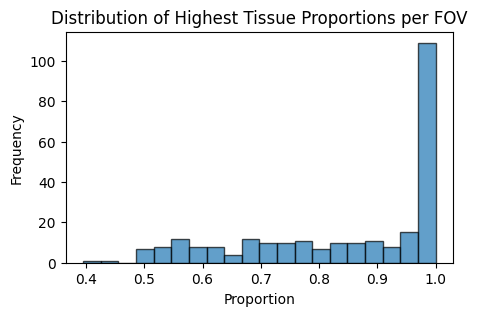

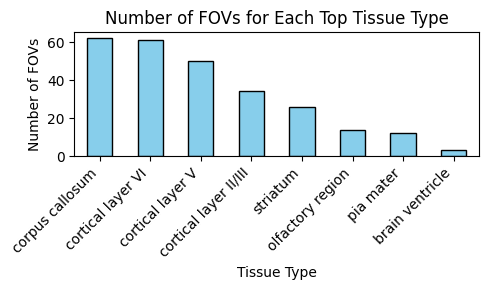

Slice_id: 1


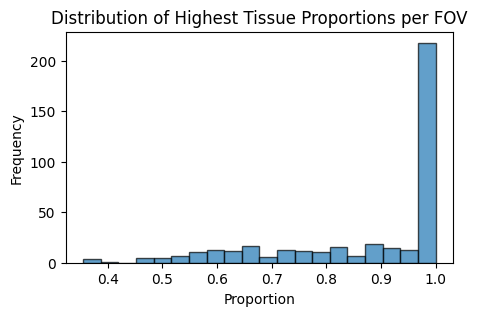

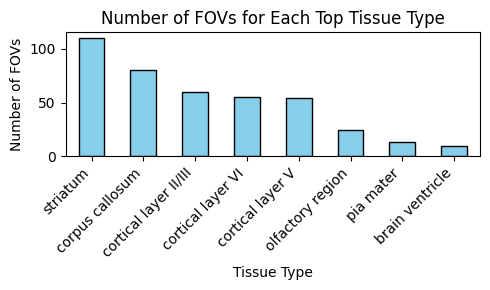

Donor_id: MsBrainAgingSpatialDonor_3
Slice_id: 0


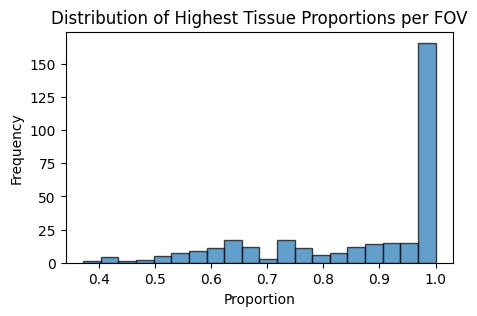

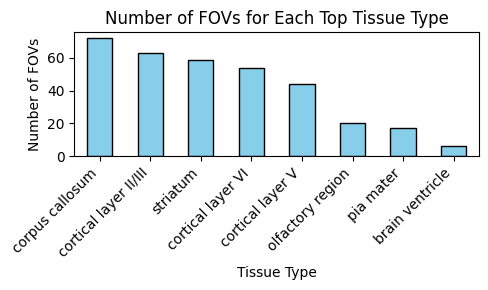

Slice_id: 1


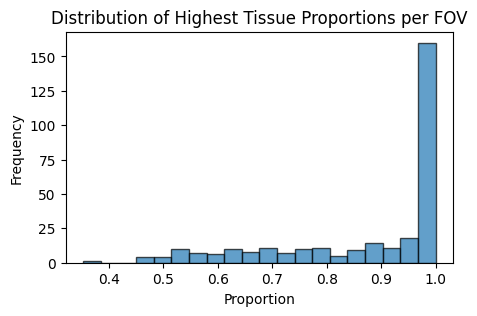

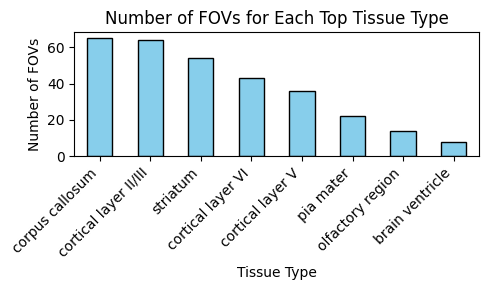

Donor_id: MsBrainAgingSpatialDonor_4
Slice_id: 0


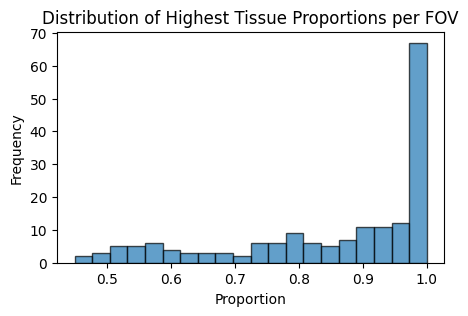

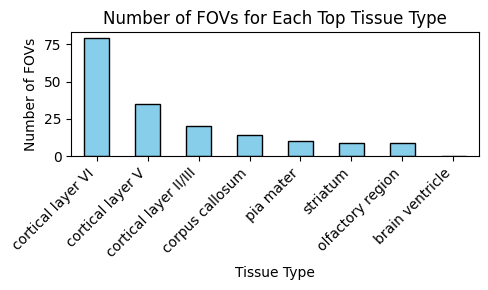

Slice_id: 1


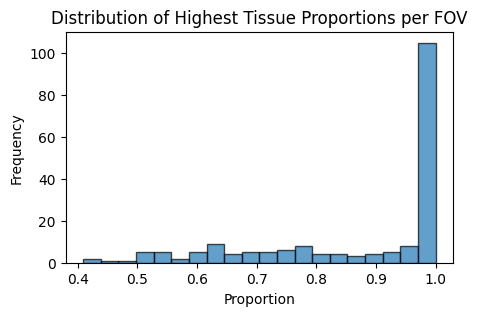

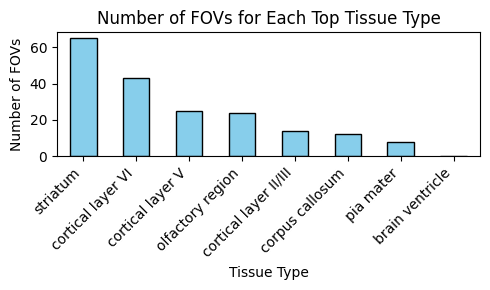

Slice_id: 2


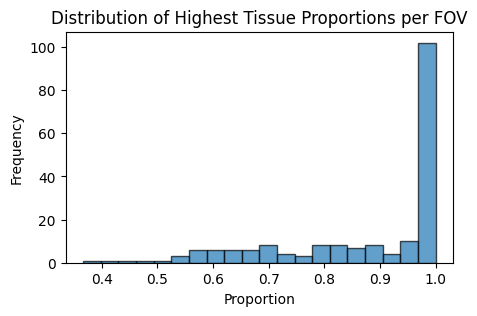

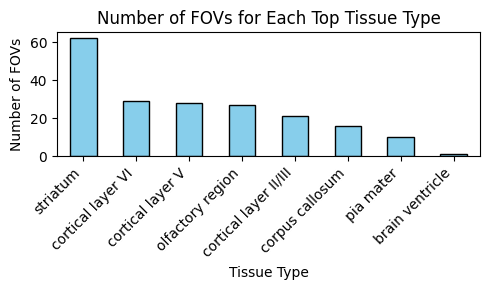

Donor_id: MsBrainAgingSpatialDonor_5
Slice_id: 0


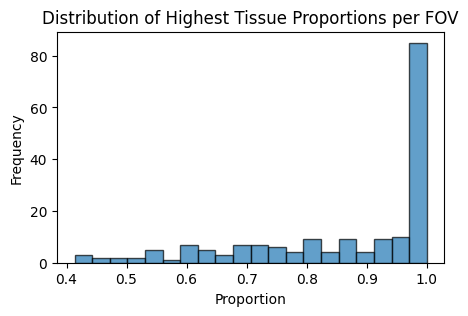

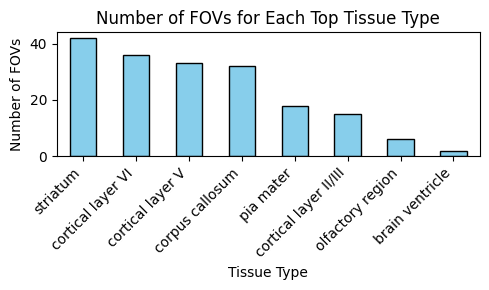

Slice_id: 1


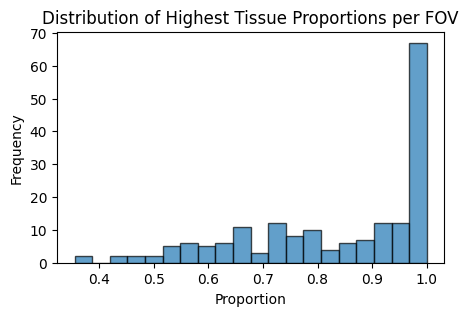

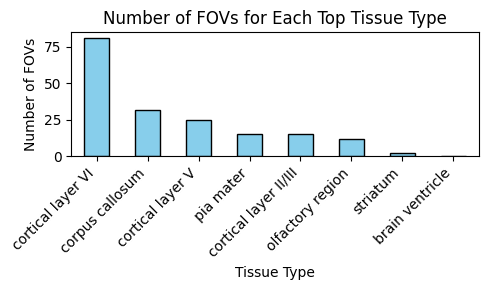

Slice_id: 2


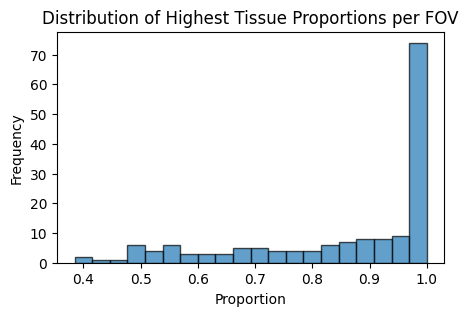

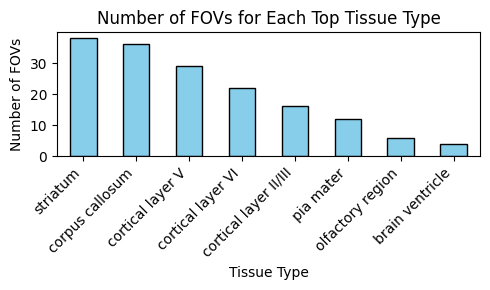

Donor_id: MsBrainAgingSpatialDonor_6
Slice_id: 0


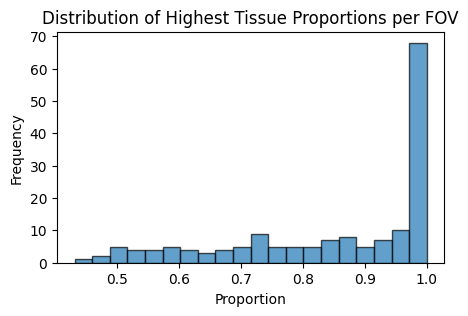

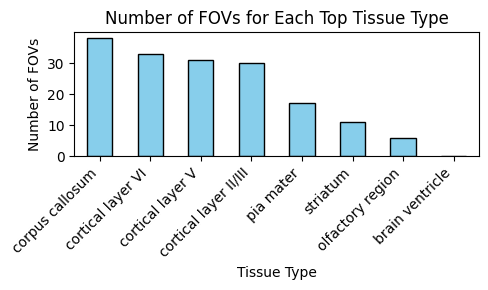

Slice_id: 1


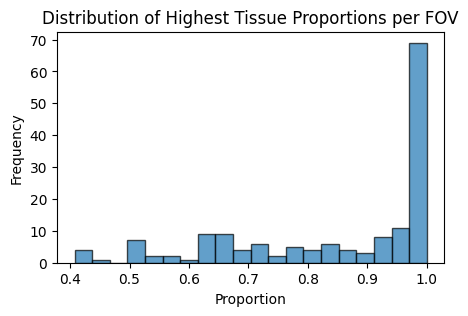

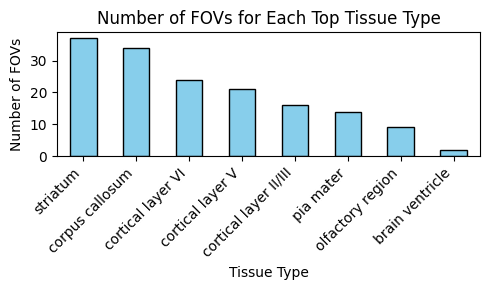

Slice_id: 2


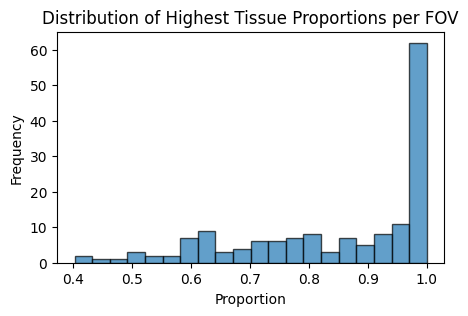

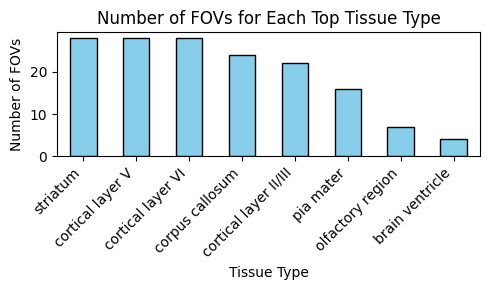

Donor_id: MsBrainAgingSpatialDonor_7
Slice_id: 0


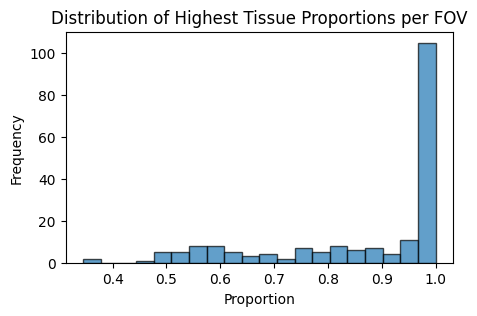

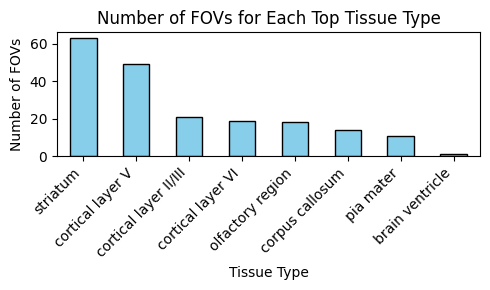

Slice_id: 1


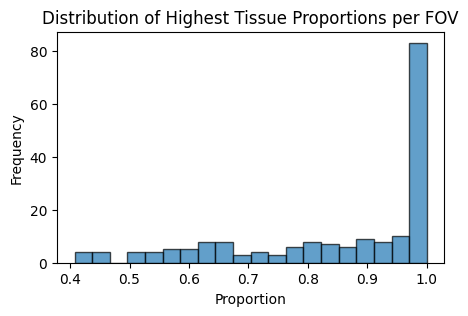

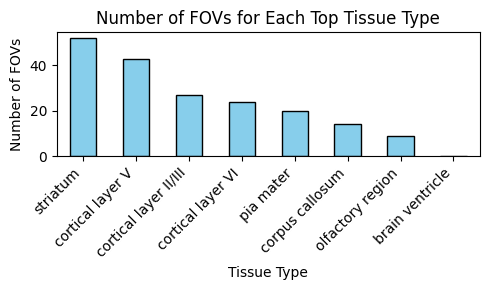

Slice_id: 2


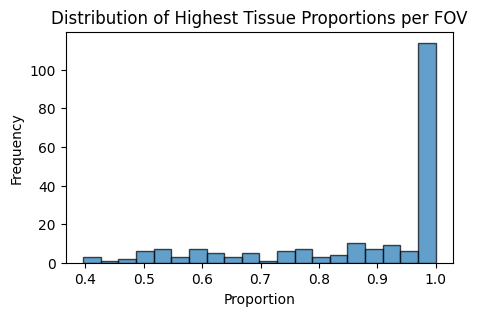

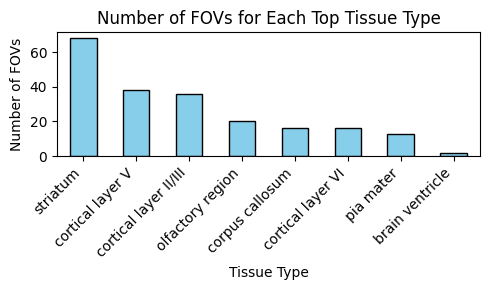

Donor_id: MsBrainAgingSpatialDonor_8
Slice_id: 0


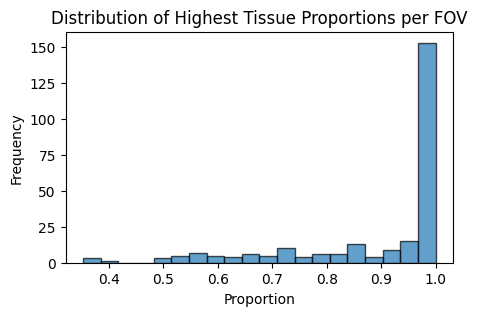

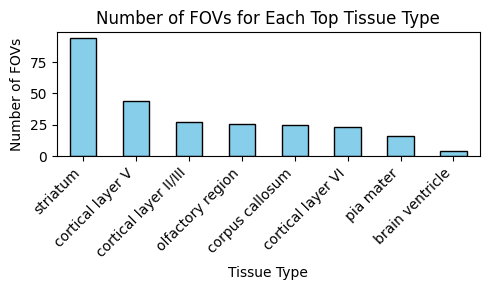

Slice_id: 1


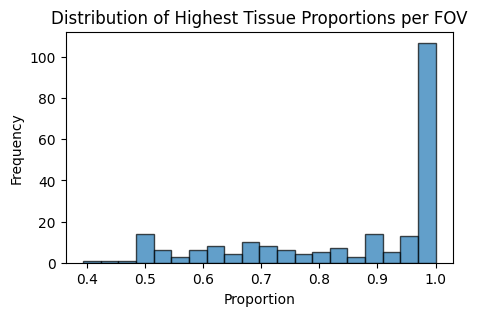

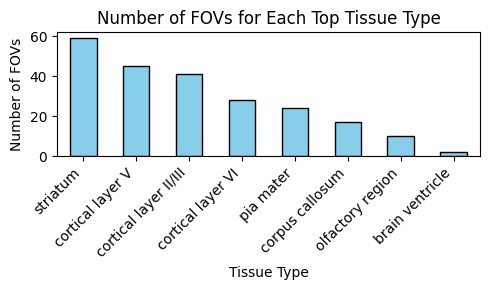

Slice_id: 2


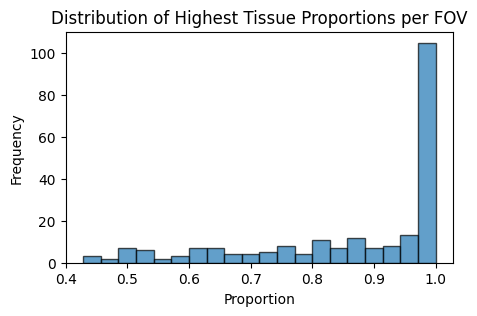

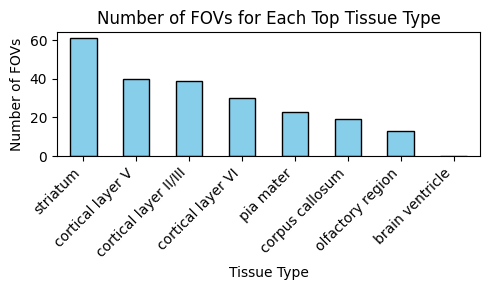

Donor_id: MsBrainAgingSpatialDonor_9
Slice_id: 0


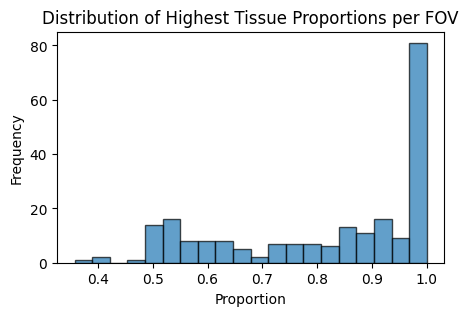

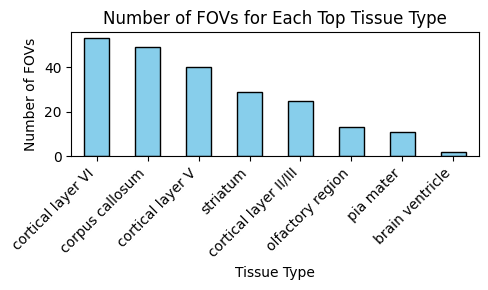

Slice_id: 1


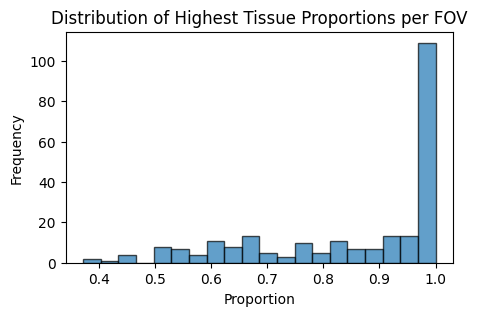

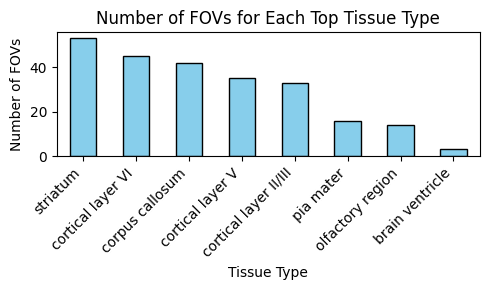

Slice_id: 2


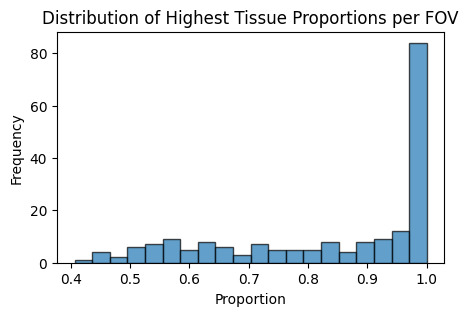

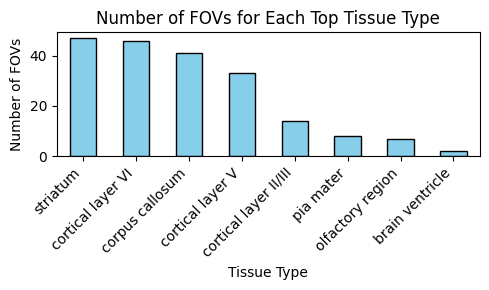

Donor_id: MsBrainAgingSpatialDonor_10
Slice_id: 0


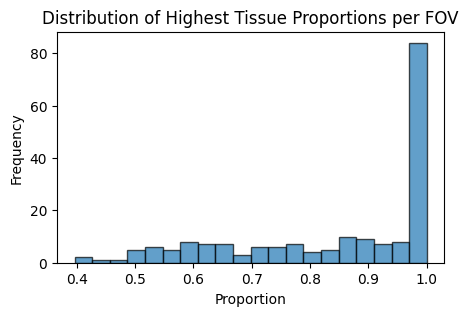

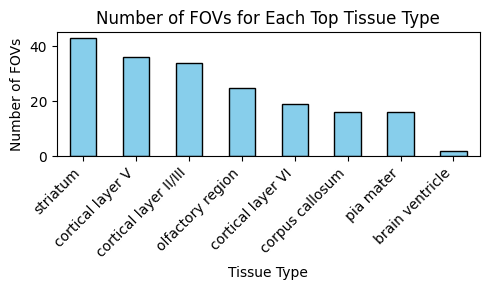

Slice_id: 1


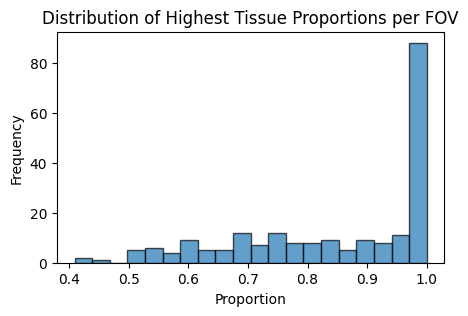

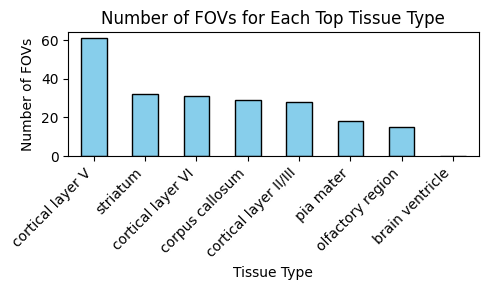

Slice_id: 2


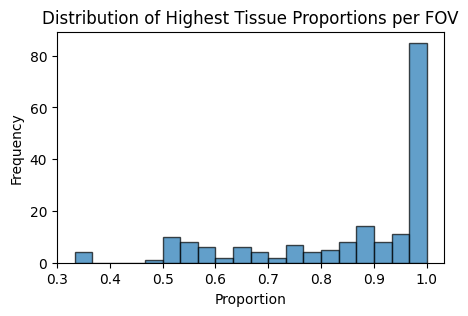

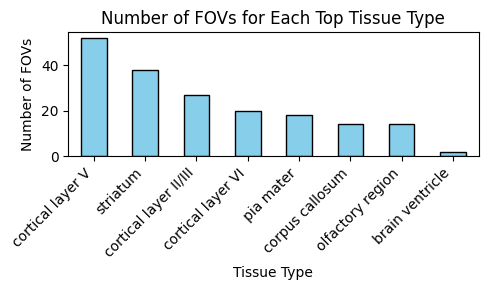

Donor_id: MsBrainAgingSpatialDonor_11
Slice_id: 0


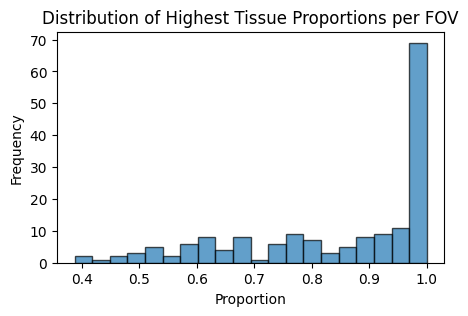

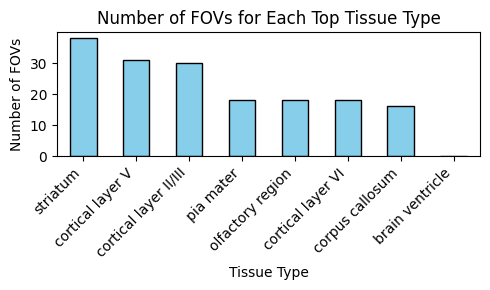

Slice_id: 1


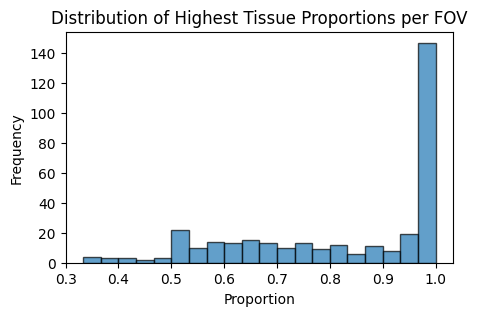

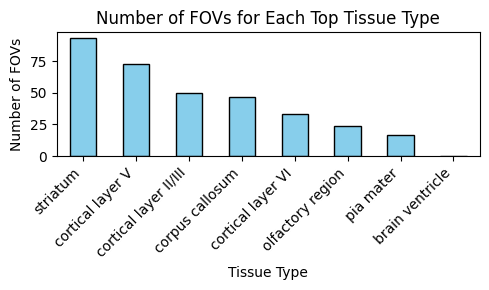

Slice_id: 2


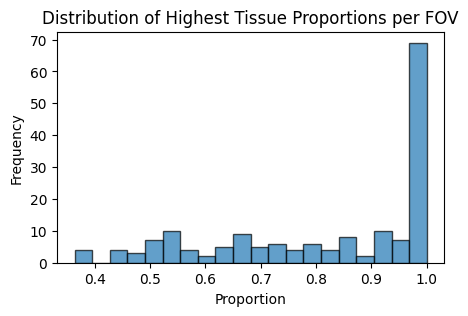

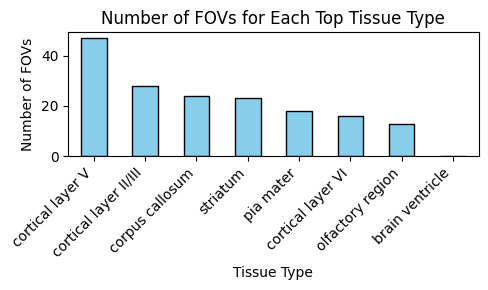

Donor_id: MsBrainAgingSpatialDonor_12
Slice_id: 0


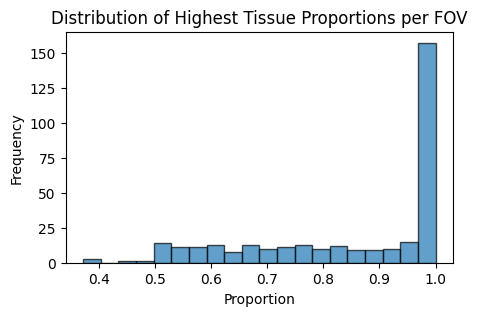

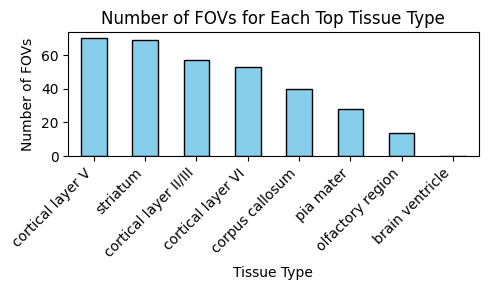

Slice_id: 1


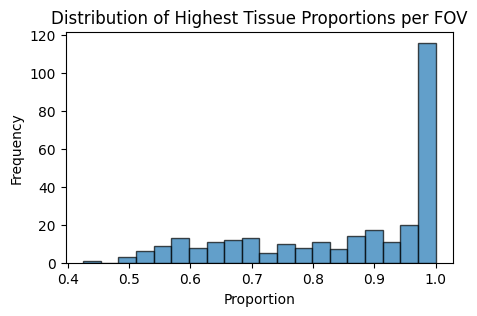

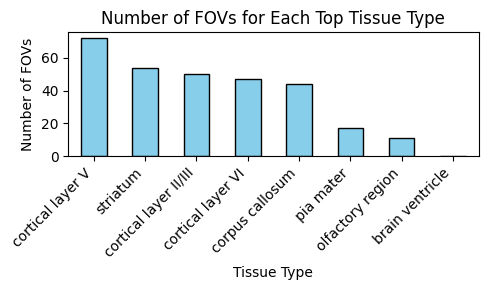

In [14]:
donor_id_list = list(obs['donor_id'].unique())
for donor_id in donor_id_list:
    # each donor
    print(f'Donor_id: {donor_id}')
    donor_obs = obs[obs['donor_id'] == donor_id]
    donor_x = adata.X[obs['donor_id'] == donor_id]
    slice_list = list(donor_obs['slice'].unique())
    slice_list.sort()
    for slice_id in slice_list: 
        # each slice
        print(f'Slice_id: {slice_id}')
        slice_obs = donor_obs[donor_obs['slice'] == slice_id]
        slice_x = donor_x[donor_obs['slice'] == slice_id]
        
        visualize_top_tissue_distribution_by_fov(slice_obs)
        
        # for tissue in tissue_list: 
        #     # each tissue
        #     print(f'tissue: {tissue}')
        #     tissue_obs = slice_obs[slice_obs['tissue'] == tissue]
        #     tissue_x = slice_x[slice_obs['tissue'] == tissue]
        #     fov_list = list(tissue_obs['fov'].unique())
        #     fov_list.sort()
        #     print(fov_list)